# 《Python计算机视觉编程》笔记--第1章

[原书链接](https://book.douban.com/subject/25906843/)

![](https://img3.doubanio.com/lpic/s27305520.jpg)

## 目录

- [第1章 基本的图像操作和处理](#第1章-基本的图像操作和处理)
    + [PIL](#PIL)
        + [convert](#convert)
        + [save](#save)
        + [thmubnail](#thmubnail)
        + [crop](#crop)
        + [transpose](#transpose)
        + [paste](#paste)
        + [rotate](#rotate)
        + [resize](#resize)
    + [Matplotlib](#Matplotlib)
        + [图像画点](#图像画点)
        + [图像轮廓](#图像轮廓)
        + [图像直方图](#图像直方图)
        + [交互式标注](#交互式标注)
    + [Numpy](#Numpy)
        + [图像的数组表示](#图像的数组表示)
        + [灰度变换](#灰度变换)
        + [从numpy数组回到pil对象](#从numpy数组回到pil对象)
        + [numpy array 缩放](#numpy-array-缩放)
        + [直方图均衡化](#直方图均衡化)

## 第1章 基本的图像操作和处理

## PIL

**PIL, (python Imaging Library)，提供通用的图像处理功能，如缩放/裁剪/旋转/颜色转换等。**

In [1]:
from PIL import Image
# 返回一个pil图像对象
pil_im = Image.open('res/cv/empire.jpg')

In [2]:
# 尺寸
pil_im.size

(189, 266)

In [3]:
# 当前格式
pil_im.format

'JPEG'

### convert

转换图像颜色

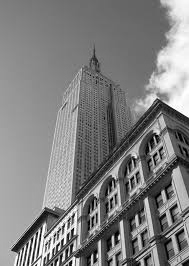

In [4]:
pil_im_l = pil_im.convert('L')  # 转换成灰度图像
pil_im_l

### save

将图像保存成各种格式

In [5]:
pil_im_l.save("res/cv/empire_l.png")  # pil可以根据尾坠确定文件格式

### thmubnail

创建缩略图，接收一个元组数组，将图像转换成元组参数指定大小的缩略图。

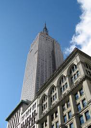

In [7]:
pil_im.thumbnail((128,128))
pil_im

In [8]:
pil_im.size

(91, 128)

### crop

裁剪指定区域。

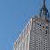

In [5]:
box = (50, 50, 100, 100)
region = pil_im.crop(box)
region

### transpose

可以旋转，转置，翻转图片。

- PIL.Image.FLIP_TOP_BOTTOM
- PIL.Image.ROTATE_90
- PIL.Image.ROTATE_180
- PIL.Image.ROTATE_270
- PIL.Image.TRANSPOSE

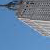

In [6]:
region_t = region.transpose(Image.ROTATE_90) # 逆时针旋转90度
region_t

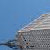

In [7]:
region_t = region.transpose(Image.TRANSPOSE) # 相当于旋转九十度之后，再上下翻转
region_t

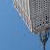

In [8]:
region_t = region.transpose(Image.FLIP_TOP_BOTTOM) # 镜面上下翻转
region_t

### paste

将小图片贴到大图上。

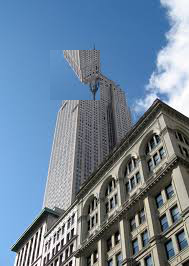

In [9]:
pil_im.paste(region_t, box)
pil_im

### rotate

旋转图像。

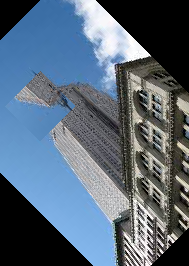

In [10]:
out = pil_im.rotate(45)
out

### resize

调整尺寸。


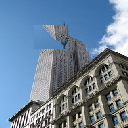

In [11]:
out = pil_im.resize((128,128))
out

## Matplotlib

用于绘制图表，和在图像上绘制点和曲线。

### 图像画点

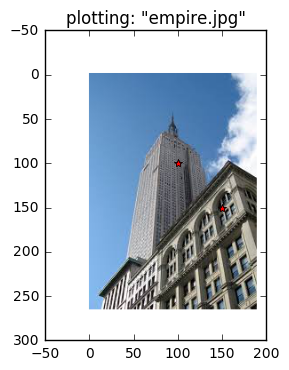

In [6]:
from pylab import *

im = array(pil_im)
imshow(im)
x = [100, 100, 150, 150]
y = x
plot(x,y,"r*")
title('plotting: "empire.jpg"')
show()

### 图像轮廓

contour()

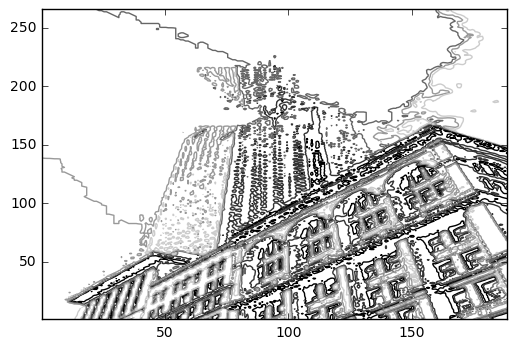

In [15]:
im = array(pil_im.convert('L'))
# 新建一个图像
figure()
# 不使用颜色信息
gray()
# 在原点的左上角显示轮廓图像
contour(im, origin="image")
show()

### 图像直方图

图像的直方图用来表征该图像像素值的分布情况，使用hist()。

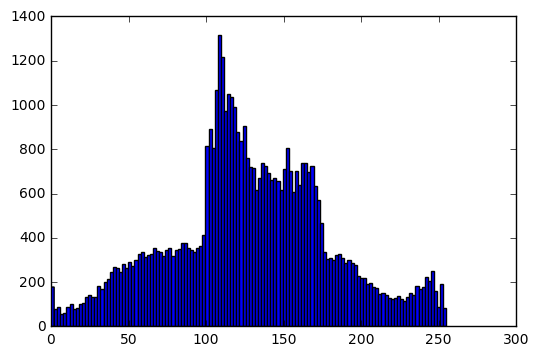

In [16]:
figure()
hist(im.flatten(), 128)
show()

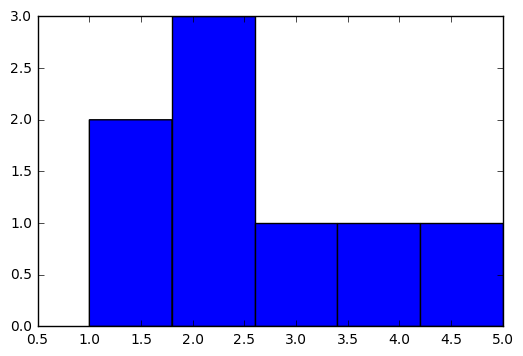

In [44]:
figure()
hist([1,1,2,2,2,3,4,5], 5)
show()

### 交互式标注

使用ginput()
ipython notebook里无法使用。
```python
im = array(pil_im)
imshow(im)
print "please click 3 points"
x = ginput(3)
print "you clicked:", x
show()
```

## Numpy

### 图像的数组表示

array()

In [7]:
im = array(pil_im)
print im.shape, im.dtype
im_l = array(pil_im_l)
print im_l.shape, im_l.dtype

(266, 189, 3) uint8
(266, 189) uint8


### 灰度变换


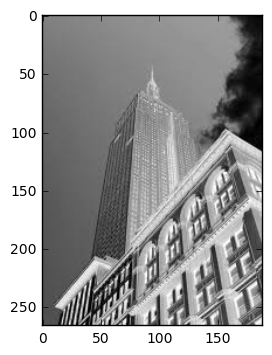

In [21]:
im2 = 255 - im_l  # 对图像进行反相处理
imshow(im2)
show()

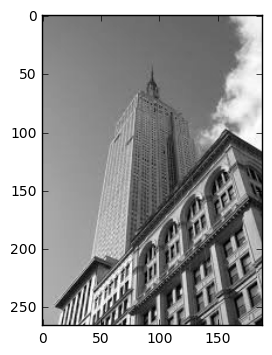

In [23]:
im3 = (100.0/255) * im_l + 100  # 将图像像素值变换到0~200的范围
imshow(im3)
show()

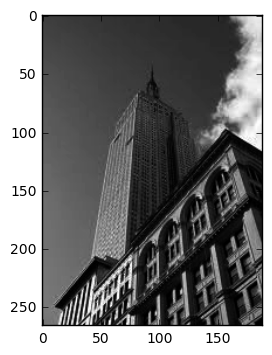

In [25]:
im4 = 255 * (im_l/255.0)**2  # 将图像像素值求平方，使暗的像素更暗
imshow(im4)
show()

### 从numpy数组回到pil对象

fromarray

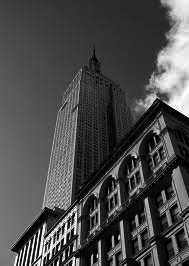

In [26]:
pil_im_ll = Image.fromarray(uint8(im4))
pil_im_ll

### numpy array 缩放

numpy本身没有缩放图像array的函数，可以借助PIL实现。

In [27]:
def imresize(im, sz):
    pil_im = Image.fromarray(uint8(im))
    return array(pil_im.resize(sz))

### 直方图均衡化

直方图均衡化是指将一副图像的灰度直方图变平，使变换后的图像中每个灰度值的分布概率都相同。

是对灰度值进行归一化的一个好方法，并且可以增强图片的对比度。

需要计算像素值的累积分布函数（cumulative distribution function， cdf）。

In [33]:
# interp 一维线性插值函数
# interp(插值x, 已知x, 已知y)
interp([1,2,4], [1,3,5], [2,6,10])

array([ 2.,  4.,  8.])

In [8]:
def histeq(im, nbr_bins=256):
    """对一副图像进行直方图均衡化"""
    imhist, bins = histogram(im.flatten(), nbr_bins, normed=True)
    cdf = imhist.cumsum()  # cumulative distribution function
    cdf = 255 * cdf/cdf[-1] # 归一化
    # 使用累积分布函数的线性插值，计算新的像素值
    im2 = interp(im.flatten(), bins[:-1], cdf)
    return im2.reshape(im.shape), cdf

In [15]:
he_im_l = histeq(im_l)[0]

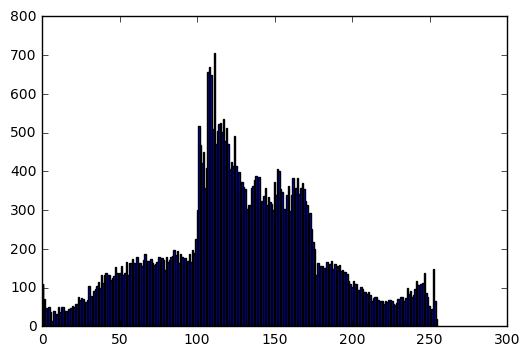

In [16]:
figure()
hist(im_l.flatten(), bins=256)
show()

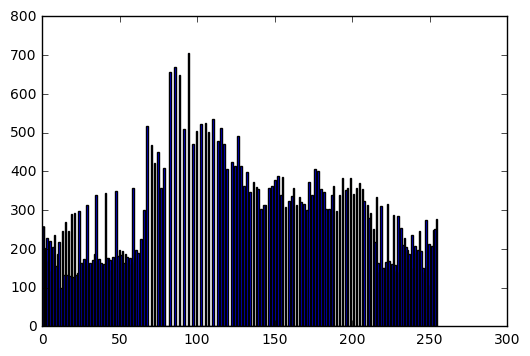

In [17]:
figure()
hist(he_im_l.flatten(), bins=256)
show()

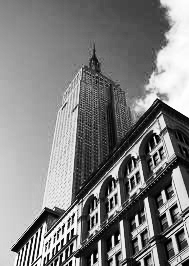

In [21]:
pil_he_im = Image.fromarray(uint8(he_im_l))
pil_he_im

### 